In [1]:
#imports

from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib widget

### Ejercicio 1:
Obtener los siguientes valores de una señal senoidal, una rampa, una onda cuadrada y una señal aleatoria:
1. valor medio: suma de las componentes entre la cantidad de muestras,
2. máximo,
3. mínimo,
4. amplitud,
5. energía: norma 2 al cuadrado, da una idea del tamaño físico de la señal,
6. acción: norma 1 de la señal,
7. potencia media: energía dividido cantidad de muestras,
8. raíz del valor cuadrático medio: raíz de la potencia.

#### NORMA DE UNA SEÑAL
medida del tamaño de las señales. La norma de un vector es un número real positivo que toma el valor 0 solo cuando el vactor es 0. Una norma muy utilizada es la norma-p:

$$ ||x||_p = (\sum_{n = 1}^{N} |x_n|^p)^\frac{1}{p} \text , 1 \leq p < \infty  $$

Y la norma infinito se define como:

$$ ||x||_\infty = sup_{n \in [1, N]} |x_n|








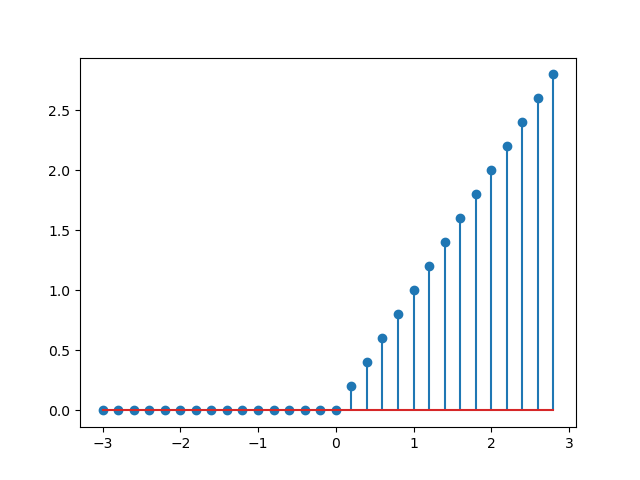

In [12]:
def senoidal(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.sin(2*math.pi*fs*t) + phi
    return x, t

def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

def aleatoria(mu,sigma,n):
    return np.random.normal(mu, sigma, n)

def rampa(fm, tini, tfin):
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.zeros(len(t))
    x[t>-0.0001] = t[t>-0.0001]
    return t,x

t, x = rampa(5,-3, 3)
plt.figure()
plt.stem(t,x)
plt.show()

### Ejercicio 3:
Calcule el error cuadrático total de aproximación en el ejemplo con funciones de Legendre bajo las siguientes condiciones:
1. con los coeficientes calculados en el ejemplo,
2. con pequeñas variaciones en torno a estos coeficentes α, construyendo una gráfica en 3D con la variación en los coeficientes en x, y y el error cuadrático total en z, 
3. con más coeficientes α, para comprobar cómo se reduce el error cuadrático total al aumentar los coeficientes.

a1: 1.224744871391589  - a3: -0.46770717334674267
error cuadratico medio: 5.6952157287597585


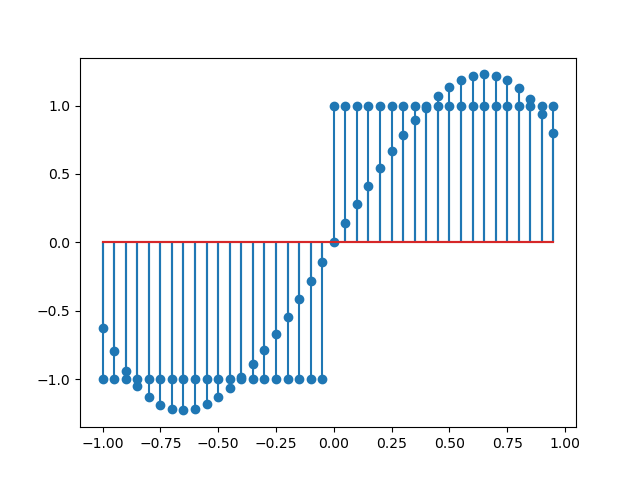

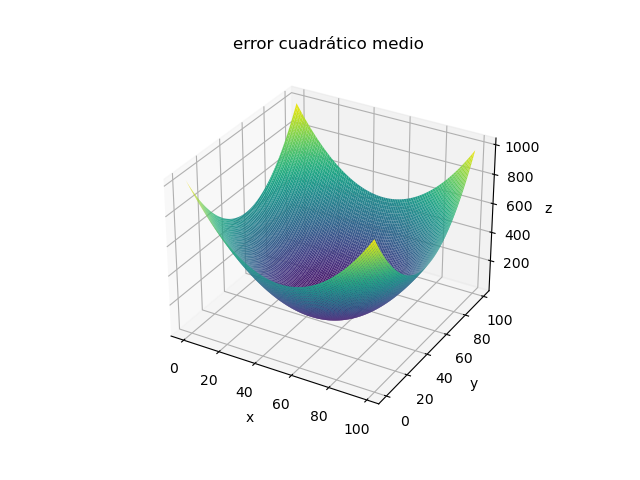

In [13]:
# Coeficientes de legendre
a_1 = np.sqrt(3/2)
a_3 = - np.sqrt(7/32)
print('a1:', a_1, ' - a3:', a_3)

# Funcion a aproximar
n = np.arange(-1,1,0.05)
x = np.zeros(len(n))
for i in range(len(n)):
    if(n[i]<-1e-5):
        x[i] = -1
    else:
        x[i] = 1

plt.close('all'); plt.stem(n,x)

# Funcion aproximada

y = a_1 * (np.sqrt(3/2)*n) + a_3 * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n))
plt.stem(n,y)

# Error cuadrático medio

e = np.power(np.linalg.norm(x-y,2),2)
print("error cuadratico medio:",e)

a_1_v = np.arange(a_1-5,a_1+5,0.1)
a_3_v = np.arange(a_3-5,a_3+5,0.1)
matriz = np.zeros([len(a_1_v), len(a_3_v)])

for i in range(len(a_1_v)):
    for j in range(len(a_3_v)):
        y = a_1_v[i] * (np.sqrt(3/2)*n) + a_3_v[j] * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n))
        e = np.power(np.linalg.norm(x-y,2),2)
        matriz[i,j] = e

# syntax for 3-D projection

X, Y = np.meshgrid(np.arange(0,len(a_1_v),1), np.arange(0,len(a_3_v),1))

def f(X,Y):
    return matriz[X,Y]
Z = f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('error cuadrático medio');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


error cuadratico medio: 5.694298538774363


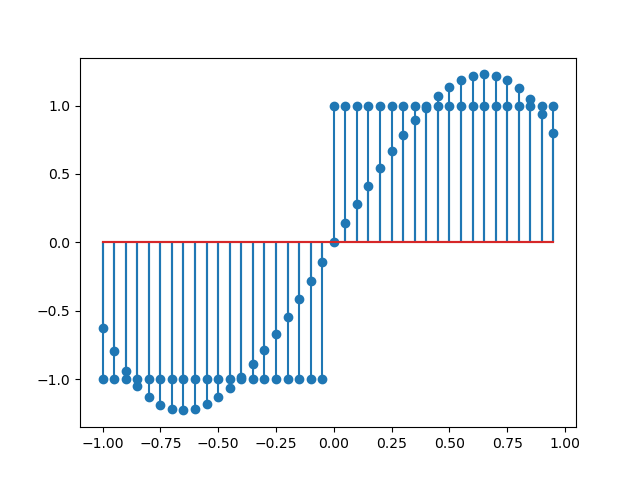

In [55]:
# PRUEBA con más coeficientes
x = np.zeros(len(n))
for i in range(len(n)):
    if(n[i]<-1e-5):
        x[i] = -1
    else:
        x[i] = 1

a_5 = np.sqrt(22)/16

y = a_1 * (np.sqrt(3/2)*n) + a_3 * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n)) + a_5 * (np.sqrt(22)/61440*(63*np.power(n,5) - 70*np.power(n,3) + 15 * n))
plt.close('all')
plt.stem(n,x)
plt.stem(n,y)

# Error cuadrático medio

e = np.power(np.linalg.norm(x-y,2),2)
print("error cuadratico medio:",e)

### Ejercicio 4:
(∗) Genere una señal como combinación lineal del conjunto de señales
senoidales con frecuencias de 1, 2, 3, 4, 5, 6, 7, 8, 9 y 10 Hz y luego:
1. mida el grado de parecido con dichas senoidales representando el resultado en un gráfico de barras,
2. vuelva a medir el grado de parecido pero con una combinación lineal en
la que se varía la fase de las senoidales y
3. realice el gráfico de barras para el caso de una señal cuadrada de 5,5 Hz.

[25.000000000000025, 25.000000000000046, 325.00000000000006, 24.999999999999936, 25.000000000000057, 50.00000000000017, 175.0000000000001, 75.00000000000013, 100.00000000000017, 50.00000000000013]


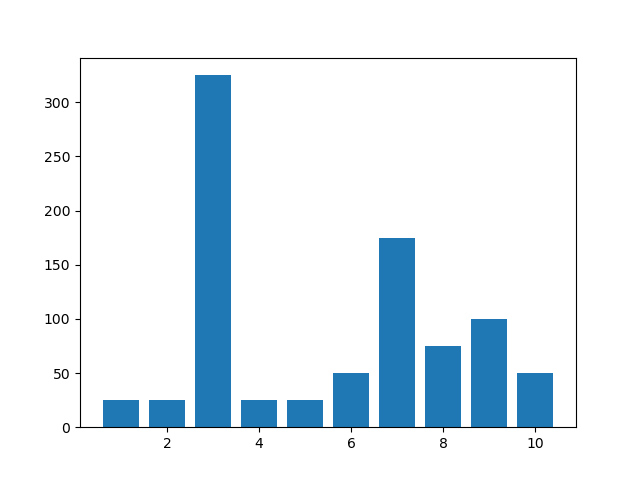

In [71]:
def senoidal(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.sin(2*math.pi*fs*t) + phi
    return x, t

x_1, t = senoidal (50, 1, 0, 0, 1)
x_2, t = senoidal (50, 2, 0, 0, 1)
x_3, t = senoidal (50, 3, 0, 0, 1)
x_4, t = senoidal (50, 4, 0, 0, 1)
x_5, t = senoidal (50, 5, 0, 0, 1)
x_6, t = senoidal (50, 6, 0, 0, 1)
x_7, t = senoidal (50, 7, 0, 0, 1)
x_8, t = senoidal (50, 8, 0, 0, 1)
x_9, t = senoidal (50, 9, 0, 0, 1)
x_10, t = senoidal (50, 10, 0, 0, 1)

super_x = x_1 + x_2 + 13 * x_3 + x_4 + x_5 + 2 * x_6 + 7 * x_7 + 3 * x_8 + 4 * x_9 + 2 * x_10
plt.stem(super_x)

productos_internos = [np.dot(x_1,super_x), np.dot(x_2,super_x), np.dot(x_3,super_x), np.dot(x_4,super_x), np.dot(x_5,super_x), np.dot(x_6,super_x), np.dot(x_7,super_x), np.dot(x_8,super_x), np.dot(x_9,super_x), np.dot(x_10,super_x)]

plt.close('all')
plt.bar(np.arange(1,11,1),productos_internos)
print(productos_internos)